<a href="https://colab.research.google.com/github/naidu199/DeepLearning/blob/master/Auto_Encoder_batch_256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [5]:
train_data=torchvision.datasets.MNIST(root="./data",train=True,transform=transforms.ToTensor(),download=True)
test_data=torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor(),download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15783176.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 491193.54it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4421393.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4393572.13it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)
test_loader = DataLoader(test_data, batch_size=256, shuffle=False)

In [8]:


# Define the autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x







In [9]:
import torch.optim as optim

Epoch [1/20], Loss: 0.0532
Epoch [2/20], Loss: 0.0365
Epoch [3/20], Loss: 0.0320
Epoch [4/20], Loss: 0.0295
Epoch [5/20], Loss: 0.0238
Epoch [6/20], Loss: 0.0229
Epoch [7/20], Loss: 0.0214
Epoch [8/20], Loss: 0.0201
Epoch [9/20], Loss: 0.0193
Epoch [10/20], Loss: 0.0185
Epoch [11/20], Loss: 0.0178
Epoch [12/20], Loss: 0.0148
Epoch [13/20], Loss: 0.0160
Epoch [14/20], Loss: 0.0159
Epoch [15/20], Loss: 0.0150
Epoch [16/20], Loss: 0.0158
Epoch [17/20], Loss: 0.0149
Epoch [18/20], Loss: 0.0158
Epoch [19/20], Loss: 0.0148
Epoch [20/20], Loss: 0.0145


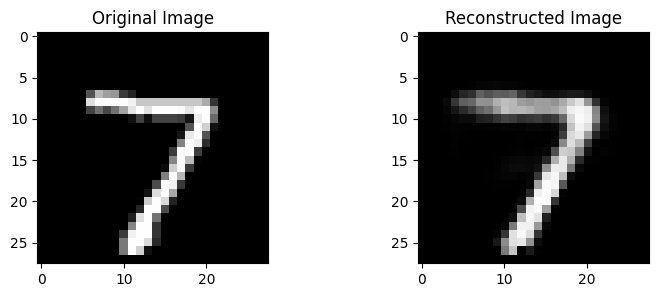

In [10]:
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=1e-3)

# Train the autoencoder
num_epochs = 20
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(torch.float32)

        # Forward pass
        output = autoencoder(img)
        loss = criterion(output, img)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test the autoencoder and visualize some results
import matplotlib.pyplot as plt

with torch.no_grad():
    for data in test_loader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.to(torch.float32)

        output = autoencoder(img)
        break

# Display original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

# Original images
axes[0].imshow(img[0].view(28, 28).numpy(), cmap='gray')
axes[0].set_title('Original Image')

# Reconstructed images
axes[1].imshow(output[0].view(28, 28).numpy(), cmap='gray')
axes[1].set_title('Reconstructed Image')

plt.show()

In [11]:
encoder = autoencoder.encoder
torch.save(encoder, 'encoder.pth')

In [13]:
import torch
import torch.nn as nn

class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        # self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        # out = self.fc3(out)
        # out = self.relu(out)
        out = self.fc4(out)
        return out

# Define the parameters
input_size = 32  # This should match the output size of the encoder
hidden_size = 64
num_classes = 10  # Assuming 10 classes for classification

# Initialize the classifier model
classifier = Classifier(input_size, hidden_size, num_classes)
print(classifier)


Classifier(
  (fc1): Linear(in_features=32, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu): ReLU()
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
encoder = torch.load('encoder.pth')
encoder.eval()

# Define the loss function and optimizer
classification_criterion = nn.CrossEntropyLoss()
classification_optimizer = optim.Adam(classifier.parameters(), lr=1e-3)

# Train the classifier
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(torch.float32)

        with torch.no_grad():
            encoded = encoder(img)

        # Forward pass
        outputs = classifier(encoded)
        loss = classification_criterion(outputs, labels)

        # Backward pass
        classification_optimizer.zero_grad()
        loss.backward()
        classification_optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Classification Loss: {loss.item():.4f}')

# Test the classifier
classifier.eval()
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        img, labels = data
        img = img.view(img.size(0), -1).to(torch.float32)

        encoded = encoder(img)
        outputs = classifier(encoded)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the classifier on the test images: {100 * correct / total}%')

Epoch [1/10], Classification Loss: 0.4959
Epoch [2/10], Classification Loss: 0.3506
Epoch [3/10], Classification Loss: 0.1861
Epoch [4/10], Classification Loss: 0.3865
Epoch [5/10], Classification Loss: 0.1743
Epoch [6/10], Classification Loss: 0.1339
Epoch [7/10], Classification Loss: 0.2011
Epoch [8/10], Classification Loss: 0.1401
Epoch [9/10], Classification Loss: 0.1975
Epoch [10/10], Classification Loss: 0.0975
Accuracy of the classifier on the test images: 94.62%


In [15]:
from tqdm.notebook import tqdm  # progress bar

# Define the training loop
for epoch in tqdm(range(num_epochs)):  # number of epochs
    for i, (images, labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        # Prepare the data
        flattened_images = images.view(-1, 28*28).to(torch.float32)

        # Forward pass through the encoder
        with torch.no_grad():
            encoded_images = encoder(flattened_images)

        # Forward pass through the classifier
        outputs = classifier(encoded_images)

        # Compute the loss
        loss = classification_criterion(outputs, labels)

        # Backward pass and optimization
        classification_optimizer.zero_grad()  # clear the gradients
        loss.backward()  # backpropagation
        classification_optimizer.step()  # update the weights

        # Print the loss for every 100 batches
        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}")


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [1/10], Step [100/235], Loss: 0.2557
Epoch [1/10], Step [200/235], Loss: 0.1832


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [2/10], Step [100/235], Loss: 0.1265
Epoch [2/10], Step [200/235], Loss: 0.1676


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [3/10], Step [100/235], Loss: 0.0818
Epoch [3/10], Step [200/235], Loss: 0.1101


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [4/10], Step [100/235], Loss: 0.1498
Epoch [4/10], Step [200/235], Loss: 0.1248


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [5/10], Step [100/235], Loss: 0.1456
Epoch [5/10], Step [200/235], Loss: 0.1911


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [6/10], Step [100/235], Loss: 0.1412
Epoch [6/10], Step [200/235], Loss: 0.1798


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [7/10], Step [100/235], Loss: 0.1874
Epoch [7/10], Step [200/235], Loss: 0.1881


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [8/10], Step [100/235], Loss: 0.1365
Epoch [8/10], Step [200/235], Loss: 0.2095


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [9/10], Step [100/235], Loss: 0.1380
Epoch [9/10], Step [200/235], Loss: 0.0982


  0%|          | 0/235 [00:00<?, ?it/s]

Epoch [10/10], Step [100/235], Loss: 0.1553
Epoch [10/10], Step [200/235], Loss: 0.0862


In [16]:
with torch.no_grad():  # turning off gradient calculations
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):  # adding progress bar
        # Prepare the data
        flattened_images = images.view(-1, 28*28).to(torch.float32)

        # Forward pass through the encoder
        encoded_images = encoder(flattened_images)

        # Forward pass through the classifier
        outputs = classifier(encoded_images)

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Update the total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and print the accuracy
    print(f"Accuracy: {100 * correct / total:.3f}%")


  0%|          | 0/40 [00:00<?, ?it/s]

Accuracy: 95.620%
